https://www.kaggle.com/code/kasimchristianloan/nlu-covid-emotion-showcase

In [9]:
import nlu
import os
import numpy as np 
import pandas as pd 

In [10]:
df = pd.read_csv("glassdoor_webscraped.csv")

In [11]:
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'helpful'], inplace = True)

In [12]:
df.columns

Index(['title', 'author_info', 'rating', 'pros', 'cons', 'helpful'], dtype='object')

In [13]:
df.head()

,title,author_info,rating,pros,cons,helpful
0,Great Place To Work,"May 3, 2021 - Partner Account Manager in Washi...",5.0,"Leader support, Transparency, Benefits, work/l...",I have not found any cons yet.,Be the first to find this review helpful
1,Opportunity for Growth,"May 3, 2021 - Business Development Representat...",5.0,-Quickly move up -Access to networking with pe...,"-Large company, there can be a decent amount o...",Be the first to find this review helpful
2,Great place to work,"May 3, 2021 - Anonymous Employee",5.0,High income potential and upward mobility,"Pressure cooker, high expectations and stress ...",Be the first to find this review helpful
3,Great culture and great opportunity for growth,"May 3, 2021 - BDR in San Francisco, CA",5.0,Excellent growth and networking opportunities,Not many cons I can think of,Be the first to find this review helpful
4,Fabulous Place to Work!,"May 3, 2021 - Customer Success Guide in Denver...",5.0,"Once you’re in, you’re given the freedom and f...",Still a “startup mentality”—so keep in mind al...,Be the first to find this review helpful


In [14]:
df.shape

(9888, 6)

## Emotion analysis
### Pros

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


<AxesSubplot:title={'center':'Count of predicted emotion labels'}>

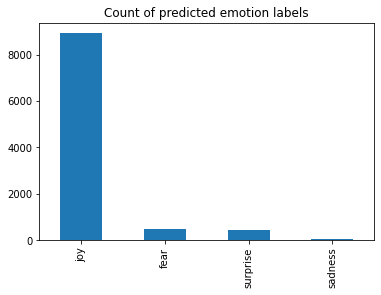

In [23]:
em_pros = nlu.load('emotion').predict(df['pros'],output_level='document')
em_pros['emotion'].value_counts().plot.bar(title='Count of predicted emotion labels')

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


<AxesSubplot:title={'center':'Count of predicted emotion labels'}>

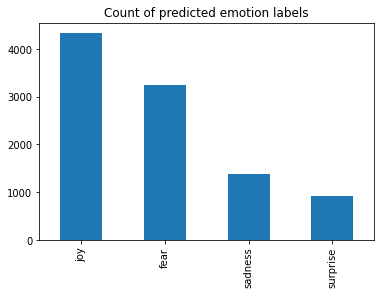

In [24]:
em_cons = nlu.load('emotion').predict(df['cons'],output_level='document')
em_cons['emotion'].value_counts().plot.bar(title='Count of predicted emotion labels')

In [25]:
# em_pros.sentence_embedding_use.to_csv('sentence_embedding_use')

In [28]:
df['emotion_pros'] = em_pros['emotion']
df['emotion_cons'] = em_cons['emotion']

## Sentiment

sentimentdl_glove_imdb download started this may take some time.
Approximate size to download 8.7 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


<AxesSubplot:title={'center':'Count of predicted sentiment labels'}>

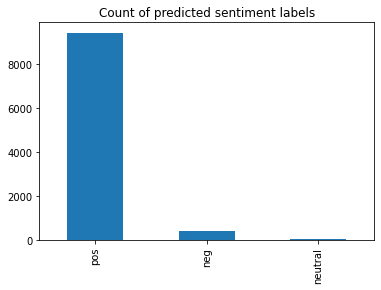

In [29]:
senti_pros = nlu.load('sentiment').predict(df['pros'],output_level='document')
senti_pros['sentiment'].value_counts().plot.bar(title='Count of predicted sentiment labels')

sentimentdl_glove_imdb download started this may take some time.
Approximate size to download 8.7 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


<AxesSubplot:title={'center':'Count of predicted sentiment labels'}>

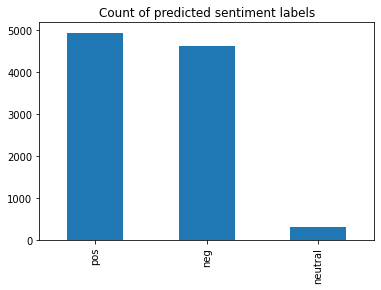

In [30]:
senti_cons = nlu.load('sentiment').predict(df['cons'],output_level='document')
senti_cons['sentiment'].value_counts().plot.bar(title='Count of predicted sentiment labels')

In [33]:
senti_cons[senti_cons['sentiment'] == 'neg']

,document,sentence_embedding_converter,sentiment,sentiment_confidence,word_embedding_glove
0,I have not found any cons yet.,"[-0.13198652863502502, 0.4641537368297577, 0.3...",neg,0.0,"[[-0.046539001166820526, 0.6196600198745728, 0..."
1,"-Large company, there can be a decent amount o...","[-0.27638909220695496, 0.30506813526153564, 0....",neg,0.0,"[[-1.2556999921798706, 0.6103600263595581, 0.5..."
10,The boundaries are a bit difficult given work ...,"[-0.2370644211769104, 0.2166195809841156, 0.46...",neg,0.0,"[[-0.03819400072097778, -0.24487000703811646, ..."
11,Management is a little bit messy... not sure w...,"[-0.1409880369901657, 0.2940976619720459, 0.52...",neg,3.0,"[[0.24654999375343323, -0.6539999842643738, 0...."
13,Lack of mentorship on my specific teams. Lack ...,"[-0.07167231291532516, 0.061229586601257324, 0...",neg,5.0,"[[0.17274999618530273, 0.0689380019903183, 0.3..."
...,...,...,...,...,...
9879,Promotion process is not clear,"[-0.2399199903011322, -0.03726480156183243, 0....",neg,5.0,"[[0.3856399953365326, -0.590719997882843, -0.5..."
9880,"pay, cross cloud deals, no unlimited PTO, perf...","[0.08641752600669861, 0.25048401951789856, 0.1...",neg,0.0,"[[0.5533699989318848, 0.3379000127315521, -0.1..."
9881,High stress Misunderstandings with management ...,"[-0.1361120045185089, 0.0458877831697464, 0.27...",neg,4.0,"[[0.23191000521183014, 0.12152999639511108, 0...."
9886,- sometimes managers can be micromanagers - ev...,"[-0.22854827344417572, 0.314942330121994, 0.37...",neg,0.0,"[[-1.2556999921798706, 0.6103600263595581, 0.5..."


In [35]:
df['senti_pros'] = senti_pros['sentiment']
df['senti_cons'] = senti_cons['sentiment']

In [36]:
df.head()

,title,author_info,rating,pros,cons,helpful,emotion_pros,emotion_cons,senti_pros,senti_cons
0,Great Place To Work,"May 3, 2021 - Partner Account Manager in Washi...",5.0,"Leader support, Transparency, Benefits, work/l...",I have not found any cons yet.,Be the first to find this review helpful,joy,sadness,pos,neg
1,Opportunity for Growth,"May 3, 2021 - Business Development Representat...",5.0,-Quickly move up -Access to networking with pe...,"-Large company, there can be a decent amount o...",Be the first to find this review helpful,joy,joy,pos,neg
2,Great place to work,"May 3, 2021 - Anonymous Employee",5.0,High income potential and upward mobility,"Pressure cooker, high expectations and stress ...",Be the first to find this review helpful,joy,fear,pos,pos
3,Great culture and great opportunity for growth,"May 3, 2021 - BDR in San Francisco, CA",5.0,Excellent growth and networking opportunities,Not many cons I can think of,Be the first to find this review helpful,joy,surprise,pos,pos
4,Fabulous Place to Work!,"May 3, 2021 - Customer Success Guide in Denver...",5.0,"Once you’re in, you’re given the freedom and f...",Still a “startup mentality”—so keep in mind al...,Be the first to find this review helpful,joy,fear,pos,pos
